In [391]:
massachusettsCounties = [
    "Barnstable",
    "Berkshire",
    "Bristol",
    "Dukes",
    "Essex",
    "Franklin",
    "Hampden",
    "Hampshire",
    "Middlesex",
    "Nantucket",
    "Norfolk",
    "Plymouth",
    "Suffolk",
    "Worcester"
]

Retrieving data from Mateo

In [ ]:
import pandas as pd

Mateo_df1 = pd.read_csv('../Dataset/raw_data/2022_massachusetts_counties_weather_data.csv')
Mateo_df2 = pd.read_csv('../Dataset/raw_data/2023_massachusetts_counties_weather_data.csv')
Mateo_df3 = pd.read_csv('../Dataset/raw_data/2024_massachusetts_counties_weather_data.csv')
Mateo_df = pd.concat([Mateo_df1, Mateo_df2, Mateo_df3])


In [ ]:
raw_df = Mateo_df.copy()
for county in massachusettsCounties:
    AQI_df = pd.read_csv(f'../Dataset/raw_data/AQI/{county}_air_pollution_history.csv')
    # check if columns already exist
    if 'aqi' in raw_df.columns:
        raw_df.update(AQI_df.set_index('dt'))
    else:
        raw_df = pd.merge(raw_df, AQI_df, left_on='date', right_on='dt', how='left')

raw_df.head()

,date,county,latitude,longitude,weather_code,temperature_2m_max,temperature_2m_min,sunrise,sunset,daylight_duration,...,dt,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2022-01-01 04:00:00+00:00,Barnstable,41.7003,-70.3002,51.0,10.764999,7.265,0,0,33183.258,...,2022-01-01 04:00:00+00:00,1.0,303.75,0.0,4.37,53.64,0.61,3.06,3.57,0.03
1,2022-01-02 04:00:00+00:00,Barnstable,41.7003,-70.3002,61.0,10.065000,4.365,0,0,33229.547,...,2022-01-02 04:00:00+00:00,1.0,353.81,0.0,13.02,26.46,1.37,5.55,6.18,0.19
2,2022-01-03 04:00:00+00:00,Barnstable,41.7003,-70.3002,61.0,3.265000,-2.185,0,0,33279.840,...,2022-01-03 04:00:00+00:00,1.0,323.77,0.0,6.85,49.35,1.53,0.74,1.36,0.24
3,2022-01-04 04:00:00+00:00,Barnstable,41.7003,-70.3002,3.0,-1.235000,-6.135,0,0,33334.656,...,2022-01-04 04:00:00+00:00,2.0,270.37,0.0,1.32,81.54,0.63,0.50,0.83,0.15
4,2022-01-05 04:00:00+00:00,Barnstable,41.7003,-70.3002,63.0,10.865000,-3.235,0,0,33393.895,...,2022-01-05 04:00:00+00:00,2.0,270.37,0.0,1.91,90.12,0.66,0.66,1.11,0.19


Data Cleaning

In [394]:
filter_columns = ['date', 'county', 'latitude', 'longitude',
                  'temperature_2m_max', 'temperature_2m_min',
                  'uv_index_max', 'wind_speed_10m_max', 'wind_gusts_10m_max','aqi', 'daylight_duration', 'sunshine_duration', 'weather_code']
raw_df_filtered = raw_df[filter_columns]
raw_df_filtered

,date,county,latitude,longitude,temperature_2m_max,temperature_2m_min,uv_index_max,wind_speed_10m_max,wind_gusts_10m_max,aqi,daylight_duration,sunshine_duration,weather_code
0,2022-01-01 04:00:00+00:00,Barnstable,41.7003,-70.3002,10.764999,7.2650,0.55,16.575644,35.640000,1.0,33183.258,0.000,51.0
1,2022-01-02 04:00:00+00:00,Barnstable,41.7003,-70.3002,10.065000,4.3650,0.65,19.107151,39.239998,1.0,33229.547,0.000,61.0
2,2022-01-03 04:00:00+00:00,Barnstable,41.7003,-70.3002,3.265000,-2.1850,0.90,29.888672,53.280000,1.0,33279.840,0.000,61.0
3,2022-01-04 04:00:00+00:00,Barnstable,41.7003,-70.3002,-1.235000,-6.1350,2.50,29.749592,50.399998,2.0,33334.656,29448.775,3.0
4,2022-01-05 04:00:00+00:00,Barnstable,41.7003,-70.3002,10.865000,-3.2350,1.40,30.158459,63.000000,2.0,33393.895,7209.592,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14471,2024-10-26 04:00:00+00:00,Worcester,42.4002,-71.9065,14.987499,5.2375,3.90,26.319422,54.360000,2.0,38040.047,33887.590,0.0
14472,2024-10-27 04:00:00+00:00,Worcester,42.4002,-71.9065,10.087500,-0.0125,3.80,21.758419,42.839996,NaN,37880.992,33450.656,3.0
14473,2024-10-28 04:00:00+00:00,Worcester,42.4002,-71.9065,8.937500,-0.0625,3.05,10.464797,24.119999,NaN,37722.812,32479.160,3.0
14474,2024-10-29 04:00:00+00:00,Worcester,42.4002,-71.9065,10.437500,-1.0125,1.80,14.264361,43.199997,NaN,37565.656,9488.694,53.0


In [395]:
raw_df_summary = raw_df_filtered.describe()
raw_df_summary

,latitude,longitude,temperature_2m_max,temperature_2m_min,uv_index_max,wind_speed_10m_max,wind_gusts_10m_max,aqi,daylight_duration,sunshine_duration,weather_code
count,14476.000000,14476.000000,14476.000000,14476.000000,14476.000000,14476.000000,14476.000000,14252.000000,14476.000000,14476.000000,14476.00000
mean,42.109971,-71.444543,16.067819,6.934637,4.783072,19.540970,39.945899,1.943026,44545.723873,26949.429297,26.59457
std,0.407960,0.938982,9.693101,9.040514,2.218652,6.906337,15.304126,0.751381,7424.085993,15497.776943,27.63209
min,41.283500,-73.182200,-17.103500,-28.403500,0.100000,4.693825,8.280000,1.000000,32548.720000,0.000000,0.00000
25%,41.793800,-72.600900,8.363000,0.113375,2.800000,14.618837,28.440000,1.000000,37757.312250,14761.355750,3.00000
50%,42.236950,-71.163100,16.465500,7.065250,4.900000,18.643690,38.160000,2.000000,44919.339500,29982.051000,3.00000
75%,42.400200,-70.752800,24.266001,14.365500,6.850000,23.344550,48.960000,2.000000,51690.465250,39600.000000,53.00000
max,42.633400,-70.099500,37.387000,26.117500,8.200000,72.363590,126.000000,5.000000,55145.277000,50798.797000,95.00000


In [396]:
# check for null values
raw_df_filtered.isnull().sum()

,0
date,0
county,0
latitude,0
longitude,0
temperature_2m_max,0
temperature_2m_min,0
uv_index_max,0
wind_speed_10m_max,0
wind_gusts_10m_max,0
aqi,224


In [397]:
# Outliers

min_values = {
    'uv_index_max': 0.1, 'aqi': 1.0
    }

for col in min_values.keys():
    min = raw_df_summary.loc['min', col]
    q1 = raw_df_summary.loc['25%', col]
    q3 = raw_df_summary.loc['75%', col]
    max = raw_df_summary.loc['max', col]
    IQR = q3-q1

    for i in range(len(raw_df_filtered)):
        val =  raw_df_filtered[col][i]
        if (val<(q1-1.5*IQR )):
            raw_df_filtered.loc[i, col] = min_values[col]
        elif (val>(q3+1.5*IQR )):
            raw_df_filtered.loc[i, col] = (q3+1.5*IQR )

raw_df_filtered.describe()

,latitude,longitude,temperature_2m_max,temperature_2m_min,uv_index_max,wind_speed_10m_max,wind_gusts_10m_max,aqi,daylight_duration,sunshine_duration,weather_code
count,14476.000000,14476.000000,14476.000000,14476.000000,14476.000000,14476.000000,14476.000000,14252.000000,14476.000000,14476.000000,14476.00000
mean,42.109971,-71.444543,16.067819,6.934637,4.783072,19.540970,39.945899,1.913556,44545.723873,26949.429297,26.59457
std,0.407960,0.938982,9.693101,9.040514,2.218652,6.906337,15.304126,0.661846,7424.085993,15497.776943,27.63209
min,41.283500,-73.182200,-17.103500,-28.403500,0.100000,4.693825,8.280000,1.000000,32548.720000,0.000000,0.00000
25%,41.793800,-72.600900,8.363000,0.113375,2.800000,14.618837,28.440000,1.000000,37757.312250,14761.355750,3.00000
50%,42.236950,-71.163100,16.465500,7.065250,4.900000,18.643690,38.160000,2.000000,44919.339500,29982.051000,3.00000
75%,42.400200,-70.752800,24.266001,14.365500,6.850000,23.344550,48.960000,2.000000,51690.465250,39600.000000,53.00000
max,42.633400,-70.099500,37.387000,26.117500,8.200000,72.363590,126.000000,3.500000,55145.277000,50798.797000,95.00000


In [398]:
# Create the weather code mapping dictionary
weather_code_map = {
    0: 'Clear sky',
    1: 'Mainly clear, partly cloudy, and overcast',
    2: 'Mainly clear, partly cloudy, and overcast',
    3: 'Mainly clear, partly cloudy, and overcast',
    45: 'Fog and depositing rime fog',
    48: 'Fog and depositing rime fog',
    51: 'Drizzle: Light, moderate, and dense intensity',
    53: 'Drizzle: Light, moderate, and dense intensity',
    55: 'Drizzle: Light, moderate, and dense intensity',
    56: 'Freezing Drizzle: Light and dense intensity',
    57: 'Freezing Drizzle: Light and dense intensity',
    61: 'Rain: Slight, moderate and heavy intensity',
    63: 'Rain: Slight, moderate and heavy intensity',
    65: 'Rain: Slight, moderate and heavy intensity',
    66: 'Freezing Rain: Light and heavy intensity',
    67: 'Freezing Rain: Light and heavy intensity',
    71: 'Snow fall: Slight, moderate, and heavy intensity',
    73: 'Snow fall: Slight, moderate, and heavy intensity',
    75: 'Snow fall: Slight, moderate, and heavy intensity',
    77: 'Snow grains',
    80: 'Rain showers: Slight, moderate, and violent',
    81: 'Rain showers: Slight, moderate, and violent',
    82: 'Rain showers: Slight, moderate, and violent',
    85: 'Snow showers slight and heavy',
    86: 'Snow showers slight and heavy',
    95: 'Thunderstorm: Slight or moderate',
    96: 'Thunderstorm with slight and heavy hail',
    99: 'Thunderstorm with slight and heavy hail'
}

# Map the weather code column using the dictionary
raw_df_filtered['weather_code'] = raw_df_filtered['weather_code'].map(weather_code_map)

# Check the updated dataframe
raw_df_filtered.head()


<ipython-input-398-18dd7f0bb20e>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df_filtered['weather_code'] = raw_df_filtered['weather_code'].map(weather_code_map)


,date,county,latitude,longitude,temperature_2m_max,temperature_2m_min,uv_index_max,wind_speed_10m_max,wind_gusts_10m_max,aqi,daylight_duration,sunshine_duration,weather_code
0,2022-01-01 04:00:00+00:00,Barnstable,41.7003,-70.3002,10.764999,7.265,0.55,16.575644,35.640000,1.0,33183.258,0.000,"Drizzle: Light, moderate, and dense intensity"
1,2022-01-02 04:00:00+00:00,Barnstable,41.7003,-70.3002,10.065000,4.365,0.65,19.107151,39.239998,1.0,33229.547,0.000,"Rain: Slight, moderate and heavy intensity"
2,2022-01-03 04:00:00+00:00,Barnstable,41.7003,-70.3002,3.265000,-2.185,0.90,29.888672,53.280000,1.0,33279.840,0.000,"Rain: Slight, moderate and heavy intensity"
3,2022-01-04 04:00:00+00:00,Barnstable,41.7003,-70.3002,-1.235000,-6.135,2.50,29.749592,50.399998,2.0,33334.656,29448.775,"Mainly clear, partly cloudy, and overcast"
4,2022-01-05 04:00:00+00:00,Barnstable,41.7003,-70.3002,10.865000,-3.235,1.40,30.158459,63.000000,2.0,33393.895,7209.592,"Rain: Slight, moderate and heavy intensity"


In [399]:
# Define AQI categories directly based on the 1-5 range
aqi_categories = {
    1: 'Good',
    2: 'Fair',
    3: 'Moderate',
    4: 'Poor',
    5: 'Very Poor'
}

# Apply the mapping directly to the 'aqi' column
raw_df_filtered['aqi'] = raw_df_filtered['aqi'].map(aqi_categories).fillna('Unknown')

# Forward fill missing values (use the last valid value)
raw_df_filtered['aqi'] = raw_df_filtered['aqi'].fillna(method='ffill')

<ipython-input-399-6edb201905a4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df_filtered['aqi'] = raw_df_filtered['aqi'].map(aqi_categories).fillna('Unknown')
<ipython-input-399-6edb201905a4>:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  raw_df_filtered['aqi'] = raw_df_filtered['aqi'].fillna(method='ffill')
<ipython-input-399-6edb201905a4>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df_filtered['

In [400]:
import numpy as np
raw_df_filtered['aqi'] = raw_df_filtered['aqi'].replace('Unknown', np.nan)

# Apply forward fill to fill NaN values with the previous valid value
raw_df_filtered['aqi'] = raw_df_filtered['aqi'].fillna(method='ffill')

raw_df_filtered

<ipython-input-400-d1cab3ff7c5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df_filtered['aqi'] = raw_df_filtered['aqi'].replace('Unknown', np.nan)
<ipython-input-400-d1cab3ff7c5c>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  raw_df_filtered['aqi'] = raw_df_filtered['aqi'].fillna(method='ffill')
<ipython-input-400-d1cab3ff7c5c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df_filtered['aqi'] = raw_df

,date,county,latitude,longitude,temperature_2m_max,temperature_2m_min,uv_index_max,wind_speed_10m_max,wind_gusts_10m_max,aqi,daylight_duration,sunshine_duration,weather_code
0,2022-01-01 04:00:00+00:00,Barnstable,41.7003,-70.3002,10.764999,7.2650,0.55,16.575644,35.640000,Good,33183.258,0.000,"Drizzle: Light, moderate, and dense intensity"
1,2022-01-02 04:00:00+00:00,Barnstable,41.7003,-70.3002,10.065000,4.3650,0.65,19.107151,39.239998,Good,33229.547,0.000,"Rain: Slight, moderate and heavy intensity"
2,2022-01-03 04:00:00+00:00,Barnstable,41.7003,-70.3002,3.265000,-2.1850,0.90,29.888672,53.280000,Good,33279.840,0.000,"Rain: Slight, moderate and heavy intensity"
3,2022-01-04 04:00:00+00:00,Barnstable,41.7003,-70.3002,-1.235000,-6.1350,2.50,29.749592,50.399998,Fair,33334.656,29448.775,"Mainly clear, partly cloudy, and overcast"
4,2022-01-05 04:00:00+00:00,Barnstable,41.7003,-70.3002,10.865000,-3.2350,1.40,30.158459,63.000000,Fair,33393.895,7209.592,"Rain: Slight, moderate and heavy intensity"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14471,2024-10-26 04:00:00+00:00,Worcester,42.4002,-71.9065,14.987499,5.2375,3.90,26.319422,54.360000,Fair,38040.047,33887.590,Clear sky
14472,2024-10-27 04:00:00+00:00,Worcester,42.4002,-71.9065,10.087500,-0.0125,3.80,21.758419,42.839996,Fair,37880.992,33450.656,"Mainly clear, partly cloudy, and overcast"
14473,2024-10-28 04:00:00+00:00,Worcester,42.4002,-71.9065,8.937500,-0.0625,3.05,10.464797,24.119999,Fair,37722.812,32479.160,"Mainly clear, partly cloudy, and overcast"
14474,2024-10-29 04:00:00+00:00,Worcester,42.4002,-71.9065,10.437500,-1.0125,1.80,14.264361,43.199997,Fair,37565.656,9488.694,"Drizzle: Light, moderate, and dense intensity"


In [401]:
#Converting daylight and sunshine duration to hours
raw_df_filtered['daylight_duration'] = raw_df_filtered['daylight_duration'] / 3600
raw_df_filtered['sunshine_duration'] = raw_df_filtered['sunshine_duration'] / 3600

<ipython-input-401-d95076018b58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df_filtered['daylight_duration'] = raw_df_filtered['daylight_duration'] / 3600
<ipython-input-401-d95076018b58>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df_filtered['sunshine_duration'] = raw_df_filtered['sunshine_duration'] / 3600


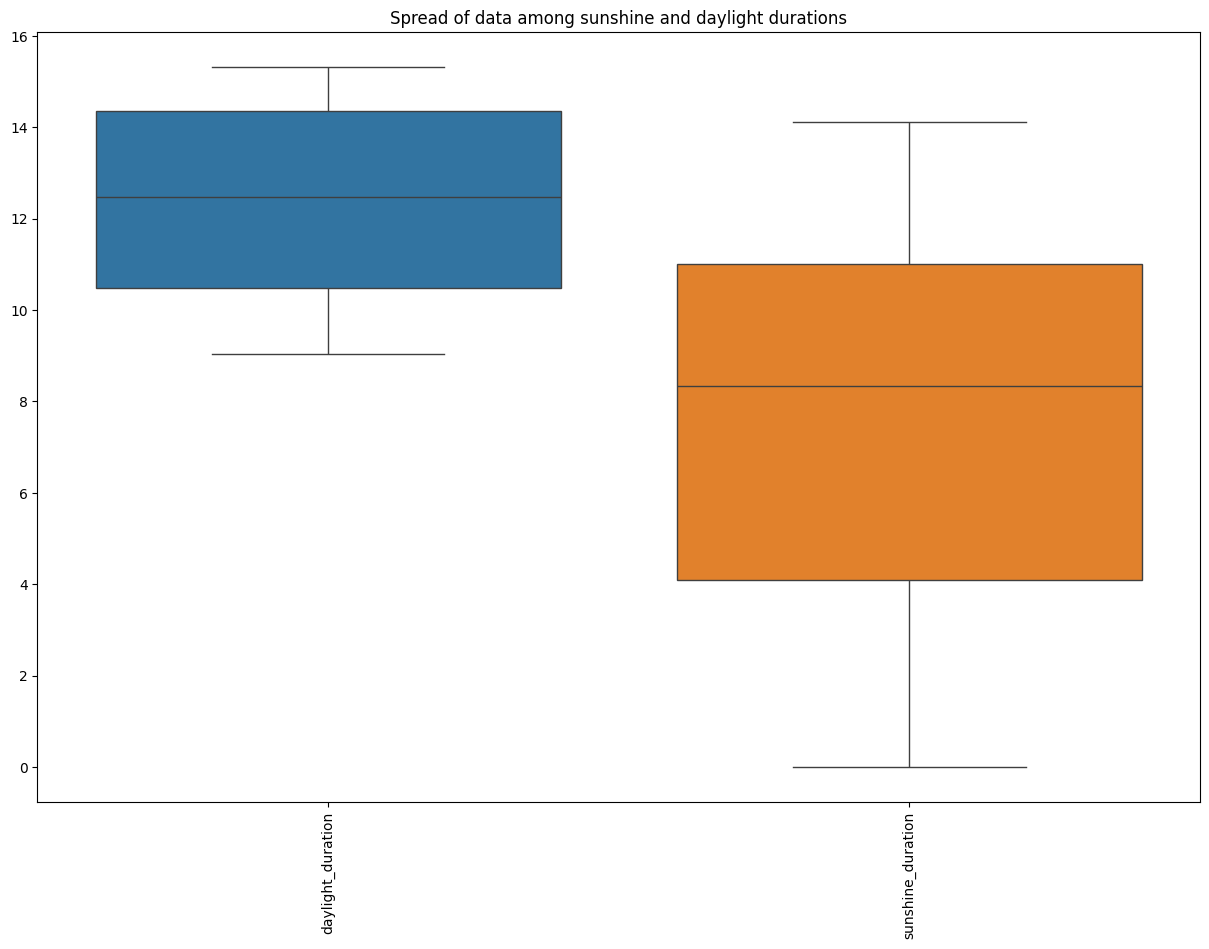

In [402]:
import seaborn as sns
import matplotlib.pyplot as plt

group1 = ['daylight_duration', 'sunshine_duration']

plt.figure(figsize=(15,10))
sns.boxplot(data=raw_df_filtered[group1])
plt.xticks(rotation=90)
plt.title('Spread of data among sunshine and daylight durations')
plt.show()

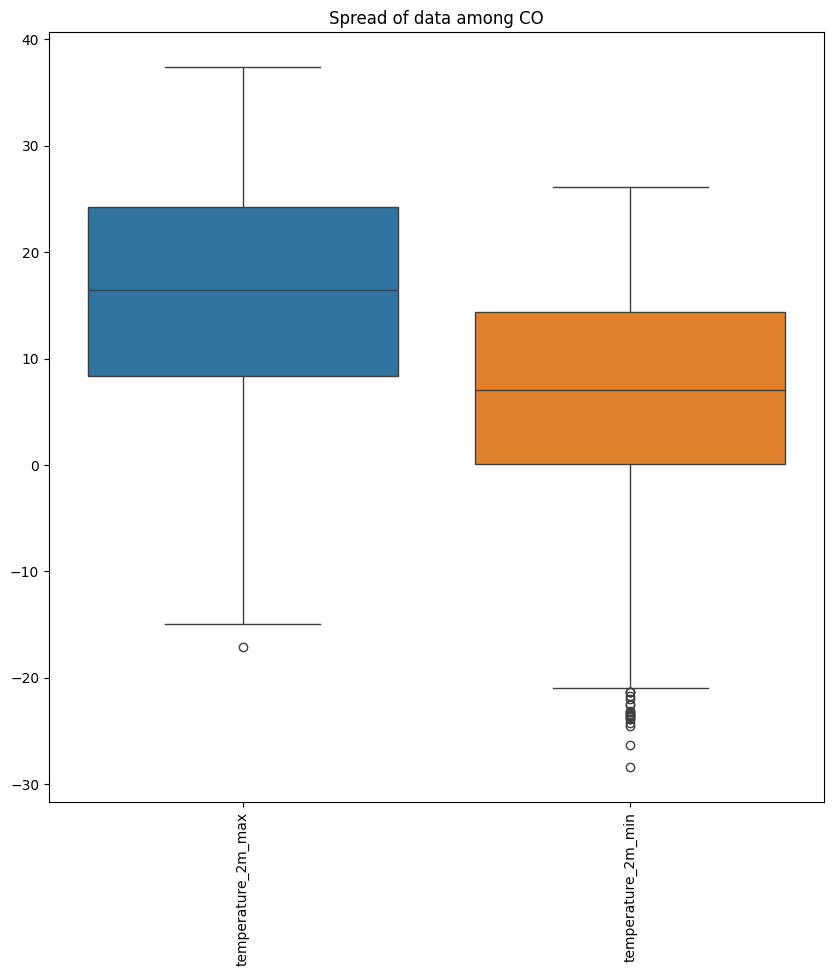

In [403]:
temp = ['temperature_2m_max', 'temperature_2m_min']

plt.figure(figsize=(10,10))
sns.boxplot(data=raw_df_filtered[temp])
plt.xticks(rotation=90)
plt.title('Spread of data among CO')
plt.show()

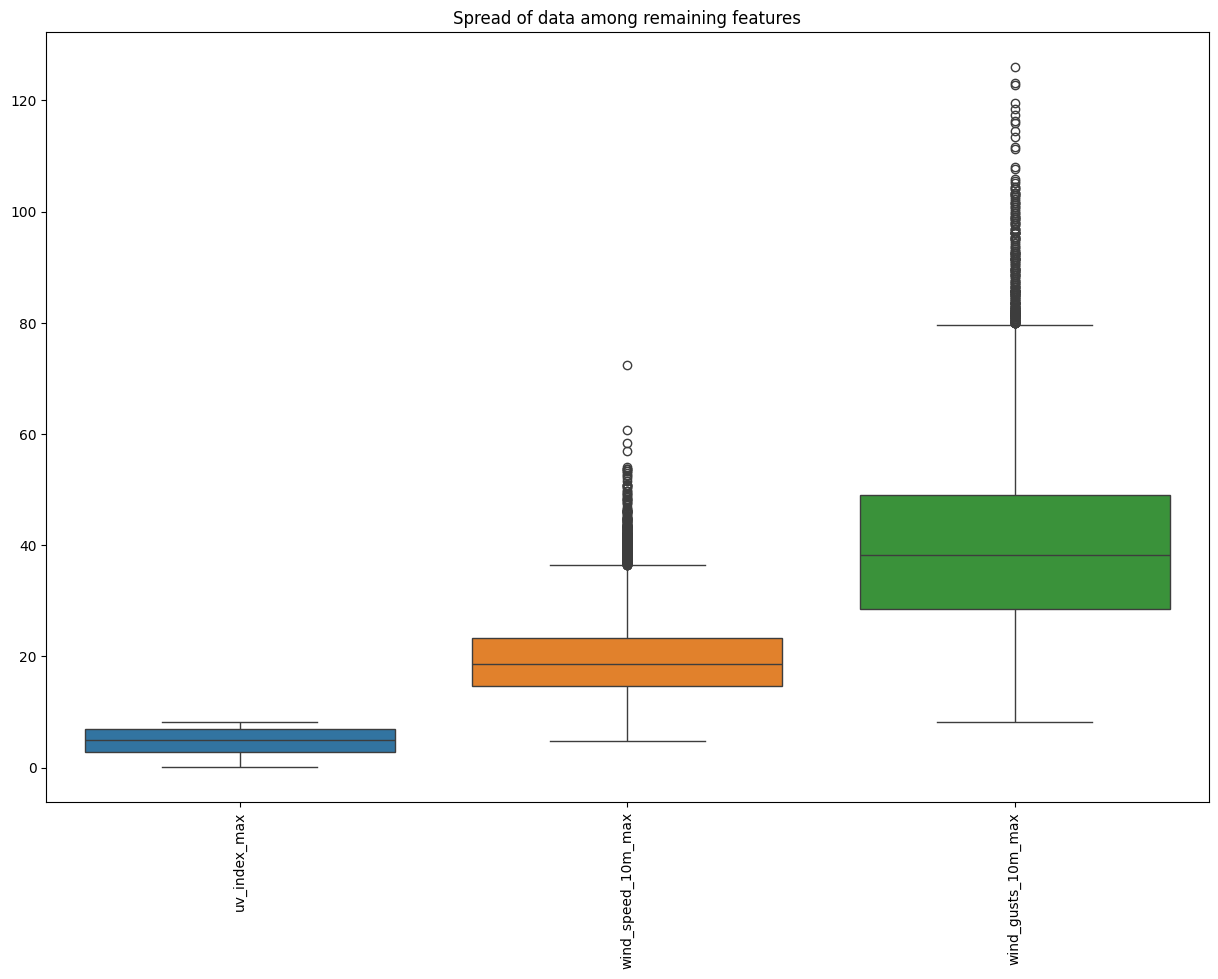

In [404]:
group4 = group1+temp

plt.figure(figsize=(15,10))
sns.boxplot(data=raw_df_filtered.drop(columns=(group4+['weather_code', 'latitude', 'longitude'])))
plt.xticks(rotation=90)
plt.title('Spread of data among remaining features')
plt.show()

In [405]:
# Rename columns for better readability
raw_df_filtered.rename(columns={
    'date': 'Date',
    'county': 'County',
    'latitude': 'Latitude',
    'longitude': 'Longitude',
    'temperature_2m_max': 'Max Temperature (°C)',
    'temperature_2m_min': 'Min Temperature (°C)',
    'uv_index_max': 'Max UV Index',
    'wind_speed_10m_max': 'Max Wind Speed (m/s)',
    'wind_gusts_10m_max': 'Max Wind Gusts (m/s)',
    'aqi': 'Air Quality Index (AQI)',
    'daylight_duration': 'Daylight Duration (hours)',
    'sunshine_duration': 'Sunshine Duration (hours)',
    'weather_code': 'Weather Condition'
}, inplace=True)

# Check the updated dataframe
raw_df_filtered.head()


<ipython-input-405-8f85f63d2175>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df_filtered.rename(columns={


,Date,County,Latitude,Longitude,Max Temperature (°C),Min Temperature (°C),Max UV Index,Max Wind Speed (m/s),Max Wind Gusts (m/s),Air Quality Index (AQI),Daylight Duration (hours),Sunshine Duration (hours),Weather Condition
0,2022-01-01 04:00:00+00:00,Barnstable,41.7003,-70.3002,10.764999,7.265,0.55,16.575644,35.640000,Good,9.217572,0.000000,"Drizzle: Light, moderate, and dense intensity"
1,2022-01-02 04:00:00+00:00,Barnstable,41.7003,-70.3002,10.065000,4.365,0.65,19.107151,39.239998,Good,9.230430,0.000000,"Rain: Slight, moderate and heavy intensity"
2,2022-01-03 04:00:00+00:00,Barnstable,41.7003,-70.3002,3.265000,-2.185,0.90,29.888672,53.280000,Good,9.244400,0.000000,"Rain: Slight, moderate and heavy intensity"
3,2022-01-04 04:00:00+00:00,Barnstable,41.7003,-70.3002,-1.235000,-6.135,2.50,29.749592,50.399998,Fair,9.259627,8.180215,"Mainly clear, partly cloudy, and overcast"
4,2022-01-05 04:00:00+00:00,Barnstable,41.7003,-70.3002,10.865000,-3.235,1.40,30.158459,63.000000,Fair,9.276082,2.002664,"Rain: Slight, moderate and heavy intensity"


In [406]:
raw_df_filtered.to_csv('2022_2024_combined_weather_data.csv')